<a href="https://colab.research.google.com/github/Jozefina-Gramatikova/Find_the_handwritten_numbers/blob/main/Handwritten_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [ ]:
#importing google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [134]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Jozefina Gramatikova - MNIST_train.csv' )

In [135]:
df_train.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [136]:
df_train.drop(['index', 'Unnamed: 0', 'labels'], axis=1, inplace=True)

In [137]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
X_train = df_train.to_numpy()

In [140]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [141]:
y_train=X_train[:,0]

In [142]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
X_train=X_train[:,0  :  ]

In [144]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [145]:
y_train.shape

(60000,)

In [146]:
X_train.shape

(60000, 784)

In [148]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Jozefina Gramatikova - MNIST_test.csv' )

In [149]:
df_test


,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,9996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,9997,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,9998,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df_test.drop(['index', 'Unnamed: 0', 'labels'], axis=1, inplace=True)

In [151]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
X_test = df_test.to_numpy()

In [153]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [154]:
y_test=X_test[:,0]

In [155]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
X_test=X_test[:,0  :  ]

In [157]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [159]:
y_test.shape

(10000,)

In [160]:
X_test.shape

(10000, 784)

In [161]:
class GaussNB(): #Gaussian Naive Baise

  def fit(self, X, y, epsilon=1e-3): #the fit method X, y - test labels; self creates a global variable withing the class its like a memory
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:] #we only want the class where y=k

      #we are going to populate our likelihoods
      self.likelihoods[k]={"mean": X_k.mean(axis=0), 'cov': X_k.var(axis=0)+ epsilon} #var=variance=sigma
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N, D = X.shape
    P_hat = np.zeros((N, len(self.K))) #predicted probability
    
    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']+np.log(self.priors[k])) #probability density function

    return P_hat.argmax(axis=1)


In [162]:
gnb = GaussNB()

In [173]:
gnb.fit(X_train,y_train)

In [174]:
y_hat=gnb.predict(X_test)

In [165]:
import matplotlib.pyplot as plt

In [175]:
X_test = X_test[:].reshape(X_test.shape[0],28,28).astype('float32')

In [176]:
X_test.shape

(10000, 28, 28)

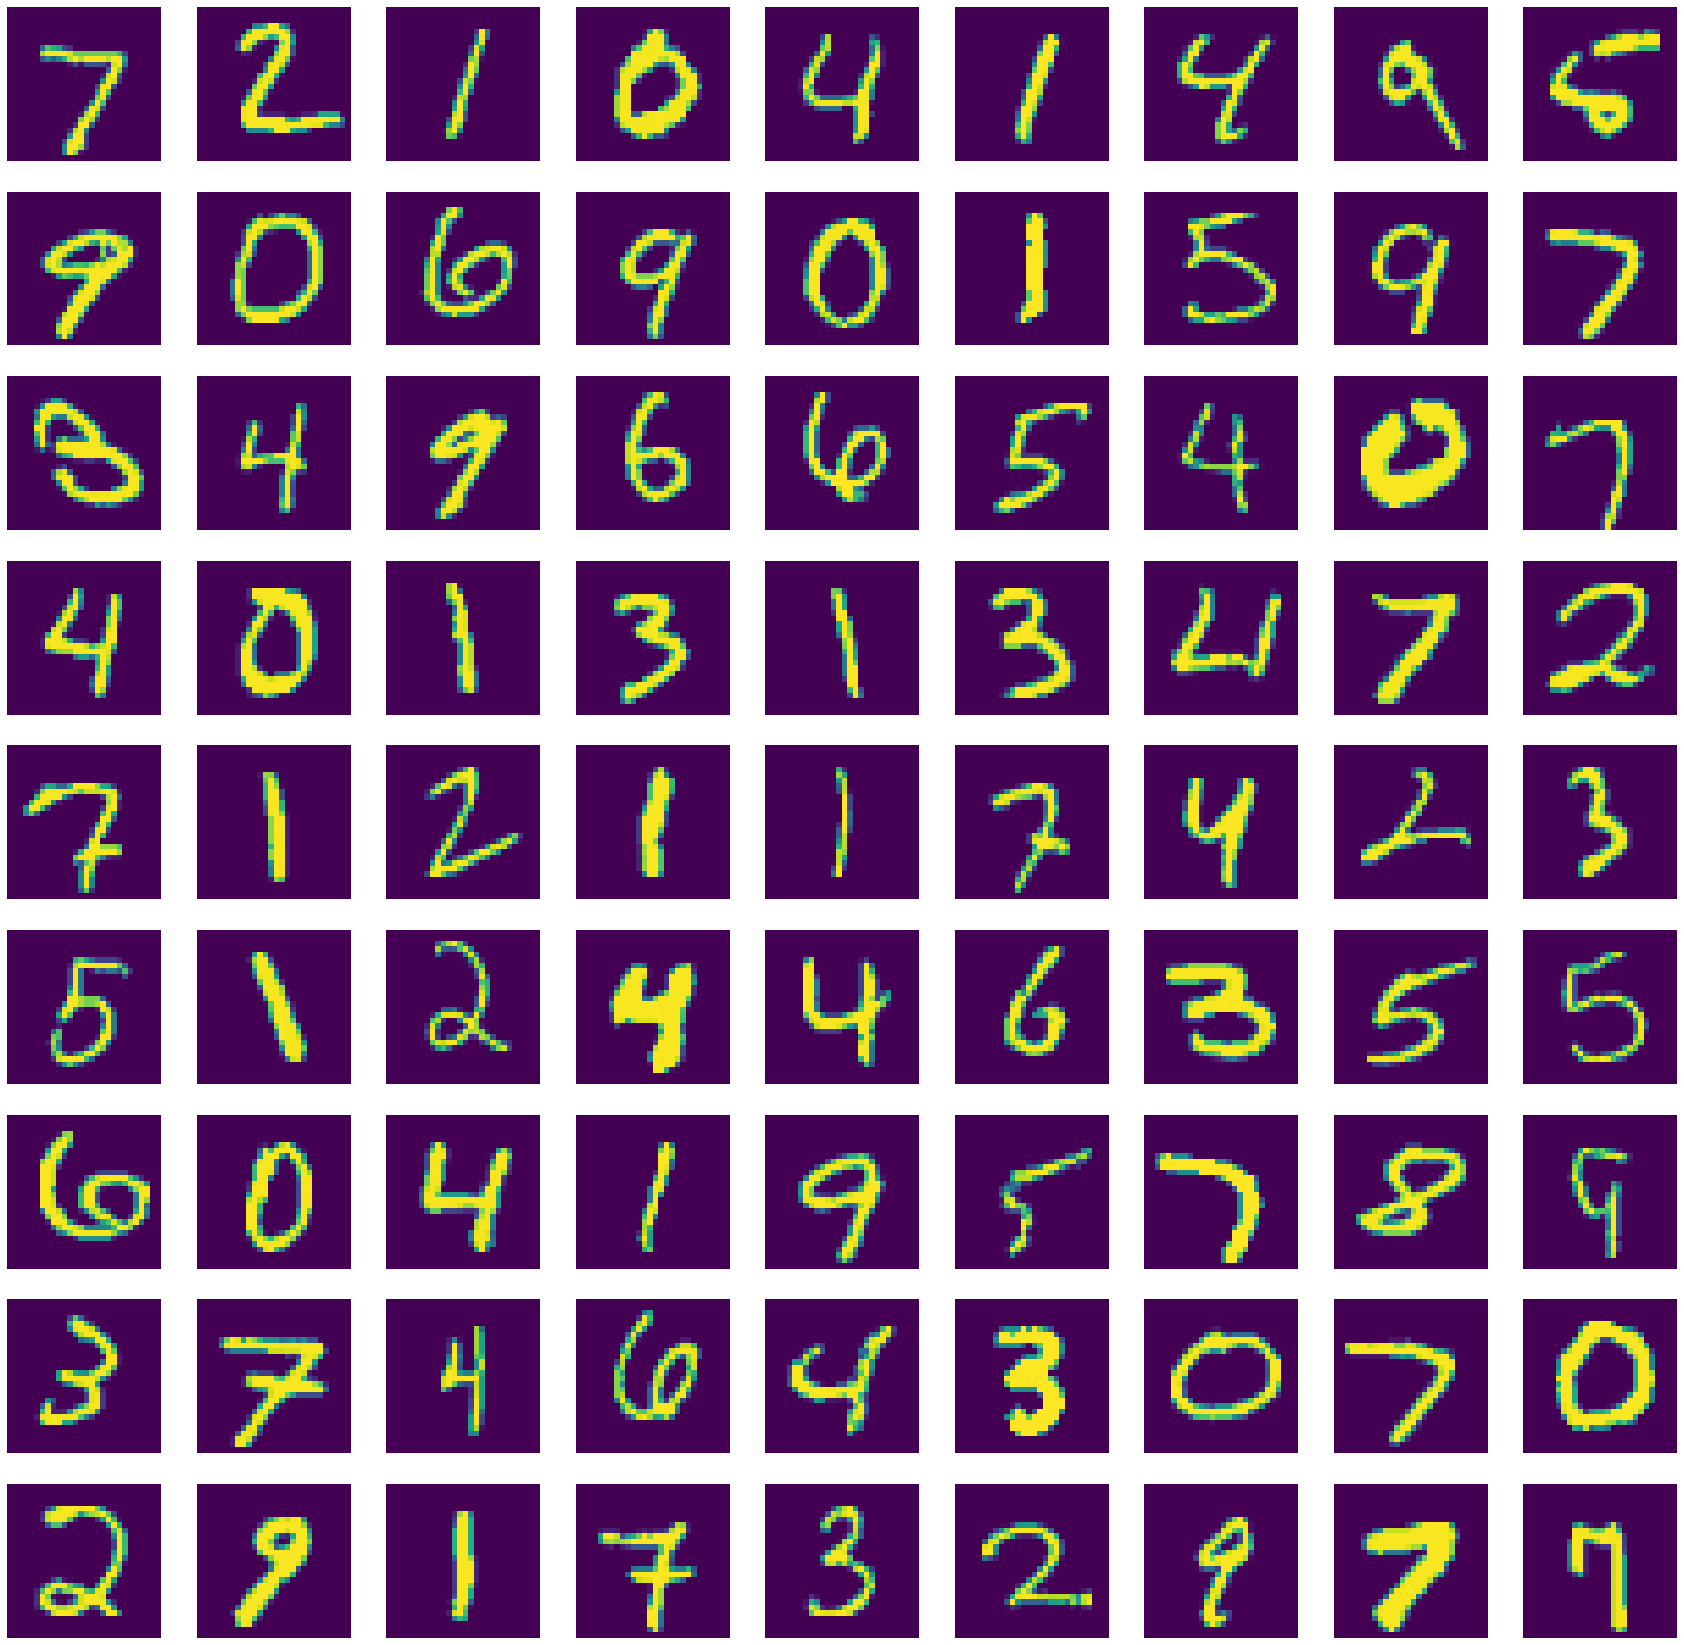

In [178]:
fig, axes = plt.subplots(9,9, figsize = (30,30) )
for (Test, ax) in zip(X_test, axes.flatten()):
  ax.imshow(Test)
  ax.axis('off')

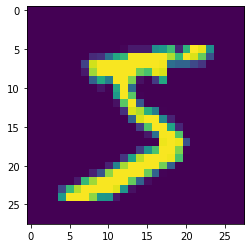

In [171]:
plt.imshow(X[0], interpolation='nearest')
plt.show()

In [180]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [184]:
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[10000]]


Non Naive Bayse

In [186]:
class GaussBayes():

  def fit(self, X, y, epsilon= 1e-3): # epsilon - a small quantity that we can use to prevent division by zero

    self.likelihoods =dict()
    self.priors =dict()
    self.K= set(y.astype(int)) # the set of "y"s as type integer

    #we are going to set our covariance matrix in a different way
    for k in self.K: #for each class k 

      X_k = X[y==k, :]  # all the columns
      N_k, D = X_k.shape #N_k how many observations I have for this particular class, D-total number of columns (features)
      mu_k = X_k.mean(axis=0) #mean of all observations

 
      self.likelihoods[k] ={"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T, X_k-mu_k)+epsilon*np.identity(D)} 
      #self likelihoods of this particular class k, matmul - matrix multiplication
      #T-transpose; using the identity matrix because we need to add a value
      

      self.priors[k] = len(X_k)/len(X) # the propbability that we land on one of our classes

  
  def predict(self, X):  #let's predict

    N, D = X.shape 
    P_hat = np.zeros((N, len(self.K)))  # P_hat is first initialised as an empty array 

    for k, l in self.likelihoods.items():  
      P_hat[:,k]=mvn.logpdf(X,l["mean"], l["cov"])+np.log(self.priors[k]) 

      return P_hat.argmax(axis=1) #P_hat is the likelihood array - contains the likelihoods, and the maximum argument of those likelihoods will be our predicted class


KNN

In [187]:
class KNNClassifier():


  def fit(self, X, y):
    self.X=X #load the data into local variables
    self.y=y

#X is different in the first function and it is not the same as X in the second function

  def predict(self, X, K, epsilon=1e-3): #K - how many neighbours?

    N=len(X) # how many rows we have    remember N =int(K*1e3) #number of observations
    y_hat = np.zeros(N) #creates an empty array of zeros witn N rows - y_hat- column vector - just a list

    for i in range(N): # we are going tp go point by point
      dist2 = np.sum((self.X-X[i])**2, axis=1) # calculate the distance squared, self.X is a vector, self.X is every single point, X[i] is the specific point
      idxt = np.argsort(dist2)[:K] #create an index; dist2 is a list of distances from the point I am investigating to every other point in the dataset
      # sorted gives the lowest distance first; [:K] - this will give the indeces for the K nearest neightbours
      gamma_k= 1/(np.sqrt(dist2[idxt]+epsilon)) # calculating the score by taking the inverse of the distance; gamma_k - individual values; this is going to give the weights
      y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax() # weighted sum; binconut - counting the elements in a particular bin; idxt - nearest neighbours' indeces; 
      # y.[idxt] - gives the classes of the nearest neighbours; we want the argument of the highest bincount, so we use .argmax()

    return y_hat